<b> Reference material,<i> Python Machine Learning</i> by S.Rashcka</b>
Cover:
1. <b>PCA</b> (unspervised data compression)
2. <b>Linear Discriminant Analysis</b> (supervised dim reduction for maximizing class separatability) 
3. <b> Kernel Principal Component Analysis</b> (nonlinear dim reduction 

I implemented PCA and Kmeans in Matlab so i'm interested to do so in Python

<b> PCA</b> aims to find the lower dimension subspace onto which to project the data such that the squared projection error is minimised. It tries to find the orthogonal component axes of maximum variaance in a dataset  (see hardnotebook)
Trying to reduce an n-dimensionanal feature space to a <i>k</i> dimensions such that k<<n. It chooses the subspace based on the greatest variance 
1. Feature Scaling   
2. Compute the covariance matrix (by singular value decomposition)
    the covariance computation will return 3 matrices, interested in the first matrix U  
3. Get the eigenvector matrix which projects X to a lower subspace Z of k dimensions
    the first k columns from U are eigenvectors 
    U(:,1:k)'* X = z 
 
<b> Practical Issues</b>

1. Because PCA due to dependency on covariance matrix is sensitive to large values. if a feature is too large then it will dominate and be a principal component, thus we MUST do feature scaling and normalisation.  
2. Assumes subspace is linear.

<b> StatQuest Youtube channel on PCA </b>  

PCA reduces high dimensional feature space to a lower dimension feature subsapce by choosing axes or direction that captures most of the variation.  
The first principal component, <i> PC1</i> captures most of the variation within the data. PC2 captures the second most variation, PC3 the third most and so on.
<i> Influence of a Feature</i> The eigenvalues are the weights that measure/scores the influence on of a feature on PC1. <b> The feature with the most variation between instances exerts the most influence on the principal componenent axes</b>.  So U is really a weight matrix used to project the feature matrix X onto its subspace or principal component axes, hence the feature with the largest weight will influence the PCs, again why feature scaling and normalisation is crucial for PCA.   

A successful PCA will have PC1 - PC3 capturing the majority of variation within the data.

In [3]:
import pandas as pd


In [4]:
df_wine = pd.read_csv('wine.data.txt', header=None)
df_wine.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
0     178 non-null int64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null int64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
13    178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
#Preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values #first column is output Y column
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

<b> Covariance Matrix</b>

Recall that <i> variance</i> measures the variability or spread in a dataset. More specifically, variance is average squared deviation from the mean.   <b> Sum( xi - ui)^2/N </b>  

<b>Covariance Matrix</b>, E (Sigma irl),  measures the extent to which two features xi, xj, move in the same direction. Its the average of the product of their mean deviation.   
............ <b> Sum(xi - ui)(xj - uj)/N </b>   
Covariance matrix is nxn dimensions.  A positive covariance between two features indicates that they increase or decrease together, conversely a negative covariance means that the features change diametrically.  




In [8]:
import numpy as np
cov_matrix = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)
print('\n EigenValues \n%s' %eigen_vals)



 EigenValues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


In [9]:
print('Eigen_vec size', np.size(eigen_vecs))

Eigen_vec size 169


In [10]:
pd.DataFrame(eigen_vecs).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.146698,0.504171,-0.117235,0.206255,-0.187816,-0.148851,-0.179264,-0.055469,-0.403055,-0.417198,0.275661,0.403567,0.000413
1,-0.242246,0.242169,0.149947,0.130489,0.568640,-0.269053,-0.592637,0.033273,-0.101834,0.217101,-0.081385,-0.152475,-0.087856
2,-0.029934,0.286985,0.656394,0.015154,-0.299209,-0.093339,0.060733,-0.100619,0.351841,0.128550,-0.012975,0.168376,-0.452519
3,-0.255190,-0.064687,0.584282,-0.090422,-0.041250,-0.101342,0.250324,0.056166,-0.500457,0.047334,0.098909,-0.067090,0.486170
4,0.120798,0.229954,0.082263,-0.839128,-0.027197,0.112567,-0.285241,0.095842,0.083739,-0.278919,-0.095930,-0.102397,0.114765
5,0.389345,0.093640,0.180804,0.193179,0.140645,0.012225,0.053146,-0.421265,0.135111,-0.280986,0.283898,-0.618600,0.094565
6,0.423265,0.010886,0.142959,0.140460,0.092687,-0.055035,0.079899,0.847225,0.003360,-0.039144,0.116729,-0.139680,-0.100444
7,-0.306350,0.018702,0.172235,0.337333,-0.085842,0.695341,-0.297372,0.166257,0.190121,-0.278622,-0.039657,0.001633,0.200129
8,0.305722,0.030404,0.158362,-0.114753,0.565105,0.498354,0.202519,-0.166197,-0.176030,0.148539,0.086060,0.388568,-0.139942
9,-0.098692,0.545271,-0.142422,0.078786,0.013235,0.159452,0.397364,0.039617,-0.214931,-0.004102,-0.571652,-0.308346,-0.115349


In [11]:
#Plot variance explained ratio of an eigenvalue--> fraction of an eigenvalue/sum of all eigenValues
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)] #descending order we want the top k eigen values
cum_var_exp = np.cumsum(var_exp) #calculates the cumulative sum


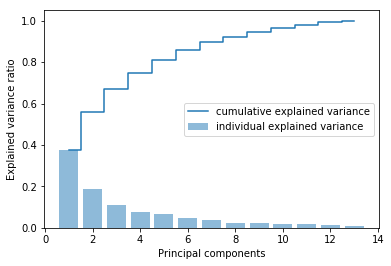

In [12]:
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance') #13 eigen values
plt.step(range(1,14), cum_var_exp, where='mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

the plot shows that the first principal component accounts for for 40% of the variance, while first 2 would be 60% (refresh on message of cumulative frequency) 

In [13]:
eigen_vecs.shape

(13, 13)

<b> Feature Transform Step</b>  
The eigen pairs have been decomposed from the covariance matrix, so the next step will be:  
1. sort eigen pairs in descending order
2. construct the projection matrix (U) from the top k eigenpairs
3. Use the projection matrix to transform the data into lower dimensional subspace

In [14]:

eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i])
for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [15]:
#Collect the eigenvectors that captured 60% of the variance in the dataset
# in this case arbitraliy choose k=2 but irl choose k based on learning curve + evaluation metric 
u= np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:,np.newaxis]))
print('Matrix U: \n',u)


Matrix U: 
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [16]:
#transform an instance x (1x13 row vector) with 13 features on to the PCA subspace obtaining z, a now 2-dim sample vector  
# z now has 2 featurs
#z =  ux 
X_train_std[0].dot(u)


array([ 2.59891628,  0.00484089])

In [17]:
X_train_pca = X_train_std.dot(u)

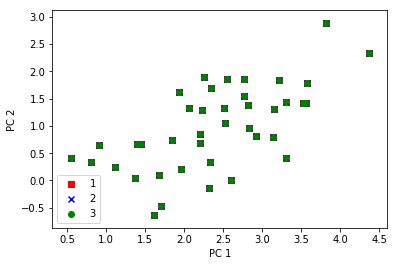

In [18]:
#visualise the now Transformed Wine training set now stored as 124x2 matrix
colors =['r','b','g']
markers = ['s','x','o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==1, 0],
               X_train_pca[y_train==1,1],
               c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()

<b> PCA in Scikit</b>   
The code below will classify the transformed Wine dataset using logistic regression and visualise the decision regions via plot decision region function.

In [19]:
from matplotlib.colors import ListedColormap


In [20]:
def plot_decision_regions(X,y,classifier, resolution=0.02):
    
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red','blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) #each unique label will have its own color
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1  #min and max values for each feature , -1 and +1 to extend range
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                np.arange(x2_min, x2_max, resolution))     #meshgrid creates a grid using the feacture vector pairs
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) #.ravel() unrolls a matrix into  1-D array or vector, .T means transpose
    Z = Z.reshape(xx1.shape)  #Z has dimensions of xx1
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)  #contourf fills region for each label y, classier stores predictions in Z 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
        
    

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)
lr= LogisticRegression()


In [23]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

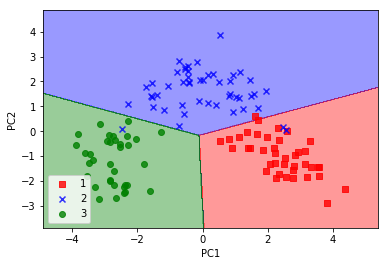

In [24]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

The above plot shows the decision regions for the training model reduced to 2 principal component axes.
Plot the decision region of the test set to see how well it did on class separation 

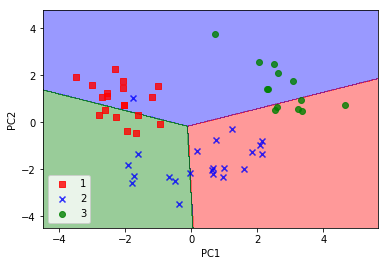

In [25]:
plot_decision_regions(X_test_pca, y_test,classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

# Linear Discriminant Analysis   

<b> Linear Discriminat Analysis</b> is a supervised algorithm that can be used  for feature extraction in order to reduce high dimensional data and overfitting in non-regularised models.
LDA aims to find a feature subspace that optimises class separatbility. Assumes that the data is normally distributed so be sure to explore Gaussian-ness of features (see hard notebook for more).  
<b> LDA Steps</b>
1. Standardise the n dimensional dataset (I personally would check before this if all n features are Gaussian)
2. For each class, compute the n-dimensional mean vector
3. Construct the between-class scatter matrix <i>S<sub>b</sub> </i> and within class scatter matrix <i> S<sub>w</sub></i>
4. compute the <b> eigenvectors </b> and <b> eigenvalues </b> of the matrix <b> S<sup>-1</sup><sub>w</sub> S<sub>b</sub></b>.
5. Sort the k largest eigenvalues to construct the n x k projection matrix, <i>U</i>, whose eigenvectors are the columns of this matrix
6. compute feature subspace Z = UX


<b>StatQuest on LDA</b>   
PCA reduces dimension based on  level of variation.  
LDA uses the class labels to reduce dimension based on maximising the separability of the the known categories. LDA creates a new axis that projects the data in way to maximum separation of the classes. How?  
  
  Creates the new axis based on the optimisation between these criteria
1. maximise the distance between the means of the classes on the new axis. for more than 2 classes, the maximum distance by each mean from a common centroid 
2. minimise the scatter or variation or spread, s,  within each class
(u1 -u2 )/ s<sub>1</sub><sup>2</sup>+s<sub>2</sub><sup>2</sup>




In [26]:
#Compute  the mean for each feature for a given class
np.set_printoptions(precision=4)
mean_vecs =[]  #mean vector for each class is nx1 
for label in range(1,4):  # there are 3 classes of wine with values 1 2 3
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))  #axis =0 means row-wise?
    print('MV {}{} \n'.format(label, mean_vecs[label-1]))
    


MV 1[ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017] 

MV 2[-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016] 

MV 3[ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912] 



Use the mean vectors to compute the within-class scatter matrix S<sub>w</sub>, which is the sum of the individual scatter matrices S<sub>i</sub> for a given class <i>i</i>:  
 <b> S<sub>i</sub> = Sum<sub>i:c, xED<sub>i</sub></sub> (x-u<sub>i</sub>)(x-u<sub>i</sub>)<sup>T</sup></b>  
   (for all examples x<sup>i</sup> a member of class i)    
 <b> S<sub>W</sub> = Sum<sub> i:c</sub> S<sub>i</sub> 


In [27]:
n =13 # 13 featuress
S_W = np.zeros((n,n))
for label,mv in zip(range(1,4),mean_vecs):        #Scatter matrix is (y1- avg(x[y==1]))(y1- avg(x[y==1]))
    class_scatter = np.zeros((n,n))                #nxn matrix
    for row in X[y==label]:
        row,mv = row.reshape(n,1),mv.reshape(n,1)   #13x1 , 13x1 
        class_scatter += (row-mv).dot((row-mv).T)   #(x-u)(x-u)'
        S_W += class_scatter

In [28]:
print('Within-class scatter matrix: {}x{}'.format(S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


#check the assumption that class labels are uniformly distibuted
print('Class label distribution: {} '.format(np.bincount(y_train[1:])))

#np.bincount: Count number of occurrences of each value in array of non-negative ints.

In [29]:
#check the assumption that class labels are uniformly distibuted
label,counts = np.unique(y_train, return_counts=True)
print ('Class Distribution: \n', np.asarray((label,counts)).T)


Class Distribution: 
 [[ 1 40]
 [ 2 49]
 [ 3 35]]


The class values are clearly not uniformly distributed so we have to normalise the scatter values by dividing by the sample size, N, i.e. we end up computing the covariance matrix, the normalised version of the scatter matrix
  Cov_matrix = 1/N * S<sub>i</sub> = 1/N Sum<sub>i:mc</sub>(x- u<sub>i</sub>)(x - u<sub>i</sub>)<sup>T</sup>

In [30]:
np.size(X_train_std,1)

13

In [31]:
n =np.size(X_train_std,1) 
S_W = np.zeros((n,n))
for label,mv in zip(range(1,4), mean_vecs):  #zip 3x13 matrix, 3 classes x 13 feature means
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter

In [32]:
print('Scaled within-class scatter matrix: {}x{}'.format(S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


Next Step is to compute the between class scatter matrix, <b> S<sub> B</sub> = Sum<sub>i:c</sub> N<sub>i</sub> (u<sub>i</sub>-u)(m<sub>i</sub>-u)<sup>T</sup> </b>, where u is dataset mean N<sub>i</sub> is number of samples in each class
  

In [33]:
mean_overall = np.mean(X_train_std, axis=0)
S_B = np.zeros((n,n))
for i,mean_vec in enumerate(mean_vecs):
    N = X[y==i+1,:].shape[0]   #number of samples for a class i
    mean_overall = mean_overall.reshape(n,1)    
    S_B += N*(mean_vec - mean_overall).dot((mean_vec-mean_overall).T)

In [34]:
print('Between-class scatter matrix: {}x{}'.format(S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


Select the linear discriminsants for new feature subspace by solving for the eigenvalues <b> S<sup>-1</sup><sub>w</sub>* S<sub>B</sub> </b>

In [35]:
eigen_vals,eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
#sort eigen pairs in descending order
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k:k[0], reverse=True) #sort by eigenvalues 
print('Eigenvalues in decreasing order: \n')


Eigenvalues in decreasing order: 



In [36]:
pd.DataFrame(eigen_pairs)

,0,1
0,8.292299e+03,"[(0.071227738467+0j), (0.150394914756+0j), (-0..."
1,1.063934e-12,"[(0.163089195108+0j), (-0.705990134723+0j), (0..."
2,8.628144e-13,"[(-0.00975768137756+0.0440827278454j), (0.5561..."
3,8.628144e-13,"[(-0.00975768137756-0.0440827278454j), (0.5561..."
4,5.914474e-13,"[(0.617106487841+0.021767356491j), (0.14221811..."
5,5.914474e-13,"[(0.617106487841-0.021767356491j), (0.14221811..."
6,2.557599e-13,"[(-0.146440924357+0.10461187023j), (0.18574996..."
7,2.557599e-13,"[(-0.146440924357-0.10461187023j), (0.18574996..."
8,2.450689e-13,"[(-0.76272128712+0j), (0.192073241542-0.062705..."
9,2.450689e-13,"[(-0.76272128712-0j), (0.192073241542+0.062705..."


In [37]:
for eigen_val in eigen_pairs:
    print(eigen_val[0])

8292.29886477
1.06393404074e-12
8.62814364844e-13
8.62814364844e-13
5.91447394302e-13
5.91447394302e-13
2.55759858397e-13
2.55759858397e-13
2.45068861312e-13
2.45068861312e-13
2.02961494345e-13
1.8651719628e-13
7.45736983254e-14


Not that values raised to 10<sup>-10</sup> and higher are basically zero. To measure how much class discriminatory information is captured by the Linear discriminants LDs(eigenvectors), plot the LDs by decreasing order

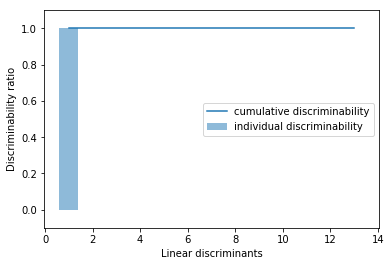

In [38]:
tot = sum(eigen_vals.real)
discr =[(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14), discr, alpha=0.5, align = 'center', label = 'individual discriminability')
plt.step(range(1,14), cum_discr, where = 'mid', label = 'cumulative discriminability')
plt.ylabel('Discriminability ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc= 'best')
plt.show()

Well well the first linear discriminant captures or explained 100% of the the maximum separation between the classes.. I am skeptical though
<b> Feature Transformation </b>   
Now that the covariance matrix has been decomposed into its eigen_pairs, and sorted  the eigenpairs by descending order of the eigenvaluesthe next steps are:  
2. construct the project matrix U<sub>L</sub>
3. Use the projection matrix to project the feature space unto a new lower dimension feature space

In [39]:
#stack the most discriminative eigenvector columns to create projection matrix,in this case only first LD explained 100% 
u = np.concatenate((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real), axis=1)
#u = eigen_pairs[0][1][:, np.newaxis].real
print('Matrix U: \n', u)

Matrix U: 
 [[ 0.0712  0.1631]
 [ 0.1504 -0.706 ]
 [-0.0709  0.1527]
 [ 0.0466 -0.0583]
 [ 0.151  -0.1808]
 [-0.2528 -0.2591]
 [ 0.6676  0.254 ]
 [ 0.2561 -0.2163]
 [-0.1254 -0.0087]
 [ 0.166   0.3283]
 [ 0.1949  0.3302]
 [ 0.4285  0.1064]
 [ 0.3198  0.0945]]


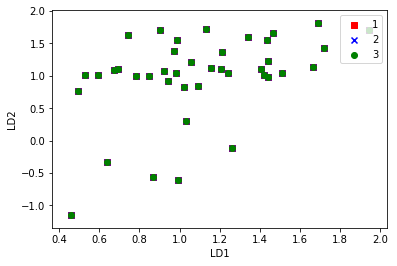

In [40]:
#projection of samples to new feature space
X_train_lda = X_train_std.dot(u)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==1,0],
              X_train_lda[y_train==1,1],
               c=c, label=l, marker=m)
plt.xlabel('LD1')
plt.ylabel ('LD2')
plt.legend(loc='upper right')
plt.show()

<b> LDA using scikit</b> 

In [41]:
#from sklearn.lda import LDA is deprecated
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components =2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

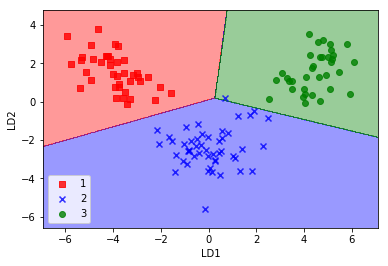

In [42]:
#classify the lower dimensional dataspace with log regression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train) 
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best')
plt.show()

<h3> Kernel PCA for Non-Linear Mapping</h3>  
Many classifiers assume that the data is linearly separable or that lack of linearity is due to noise.  
Recall that kernels aka similarity functions that tackle non-linear problems by projecting the dataset onto a higher dimesionality (d>>n) that is linearly separable (SVM does this).   
<b> Rationale</b>
Use kernel function to project the non-linear data unto a higher dimensionality that is more linearly separable
then use PCA to project the high-dimension transformation unto a lower dimensionality space.

as usual will do the long implementation for foundational learning then the scikit version 


<b> More on Kernel Trick and PCA</b>   
Kernel function is a way of computing the dot product some two vectors as a measure of similarity (mathematical framework is in my hard notebook). The kernel trick when used with PCA would've already projected the features unto a lower dimensional principal component axes, so that we don't have to explicitly compute the eigenvectors and thus the projection matrix, U, as was the case with standard PCA. 
    Kernel matrix is as follows <b> K = @(X)*@(X)<sup>T</sup> </b>  
1. Polynomial kernels
    k(x<sub>j</sub>, x<sub>k</sub>) = x<sub>j</sub><sup>T</sup> x<sub>k</sub> + E)<sup>p</sup>,where E is the threshold and p is the degree of polynomial
    
2. Hyprbolic Tangent(Sigmoid) Kernel  
     k(x<sub>j</sub>, x<sub>k</sub>) = tanh(n x<sub>j</sub><sup>T</sup> x<sub>k</sub> + E)
3. Radial Basis Function aka Gaussian
    k(x<sub>j</sub>, x<sub>k</sub>) = exp(- (|| x<sub>j</sub> -x<sub>k</sub>)||<sup>2</sup> )/ 2sigma<sup>2</sup>)
    
 
<b> RBF Kernel PCA Implementation steps</b>
1. Compute Similarity matrix k by calculating exp(- (|| x<sub>j</sub> -x<sub>k</sub>)||<sup>2</sup> )/ 2sigma<sup>2</sup>) for each pair of features
2. Center the kernel matrix K using the following equations
K' = K-l<sub>m</sub>K-l<sub>m</sub> + l<sub>m</sub>K*l<sub>m</sub>, where lm is a mxm dimensional matrix where all elements = 1/m
3. Collect the top k eigenvectors of the centred kernel matrix based on the corresponding eigen values. Note that in this case the eigenvectros arent the principal component axis but instead the samples projected onto thos axes

In [58]:
#Using an RBF Kernel PCA
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh

def rbf_kernel_pca(X, gamma, n_components):
    """ 
    RBF kernel PCA Implementation
    Parameters
    -----------
    X : {Numpy ndarray}, shape = [m_samples by n_features]
    
    gamma: float, Tuning parameter of the RBF Kernel == 1/2sqr(sigma)
    
    n_components: int, Number of principal components
    
    Returns 
    --------
    X_pca : {Numpy ndarray}, shape = {m_samples, k_features}, this is the projected dataset
    
    """
    #Calculate the pairwise squared Euclidean distances in the mxn dimensional dataset (ref my previous matlab code)
    sq_dists =pdist(X, 'sqeuclidean')  #had to do this shit manually in matlab tho
    #convert the pairwise distances into a square matrix
    mat_sq_dist = squareform(sq_dists)
    #compute the symmetric kernel matrix
    K = exp(-gamma*mat_sq_dist)
    #Center the kernel matrix : ref to hard notebook about centering matrix
    N = K.shape[0]  #N is total samples
    one_n = np.ones((N,N))/N
    K = K-one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #Obtaining eigenpairs from the centred kernel matrix
    #numpy.eigh returns them in the sorted order
    eigvals, eigvecs = eigh(K)
    
    #Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1, n_components+1))) #stacks them column-wise like hstack or concatenate(axis=1)
    
    return X_pc
    



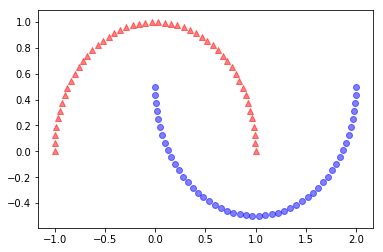

In [46]:
#Create a 2-d dataset of 100 sample points representing two half-moon shapes
from sklearn.datasets import make_moons
X,y = make_moons(n_samples =100, random_state=123)
plt.scatter(X[y==0,0], X[y==0,1], color ='red', marker ='^', alpha=0.5 )
plt.scatter(X[y==1,0], X[y==1,1], color = 'blue', marker='o', alpha=0.5)
plt.show()

clearly these half-mone shapes are not linearly separable so I'll use kernel PCA to transform this dataset suitable for a linear classifier. But first let's see how standard PCA would project this data

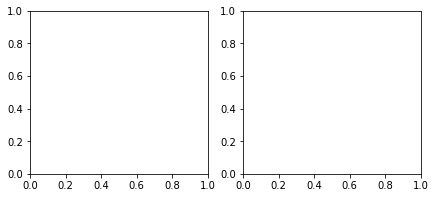

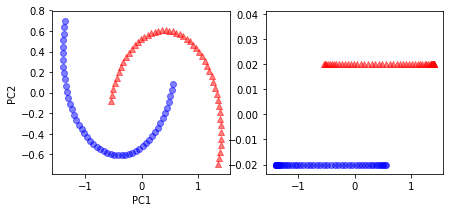

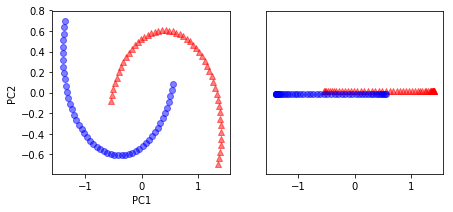

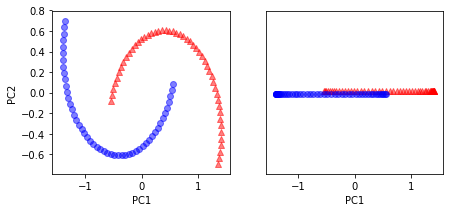

In [56]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components =2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1], color = 'red', marker='^', alpha=0.5 )
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1], color = 'blue', marker='o', alpha=0.5 )
ax[1].scatter(X_spca[y==0,0], np.zeros((50,1))+0.02, color = 'red', marker='^', alpha=0.5 )
ax[1].scatter(X_spca[y==1,0], np.zeros((50,1))-0.02, color = 'blue', marker='o', alpha=0.5 )
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

In [63]:
#Now try RBF kernel
from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X,gamma=15, n_components=2)


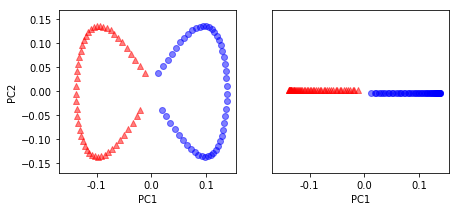

In [64]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1], color = 'red', marker='^', alpha=0.5 )
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1], color = 'blue', marker='o', alpha=0.5 )
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1))+0.02, color = 'red', marker='^', alpha=0.5 )
ax[1].scatter(X_kpca[y==1,0], np.zeros((50,1))-0.02, color = 'blue', marker='o', alpha=0.5 )
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

plt.show()

Now the dataset is linearly separable!

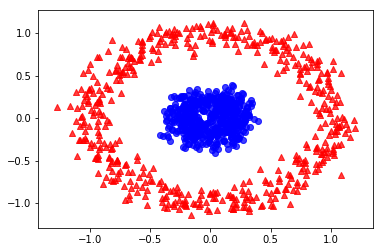

In [71]:
#Separating concentric circles
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0,0], X[y==0,1], color ='red', marker ='^', alpha=0.5 )   #ooohkay X[y==0,0] means All  values in col[0] with negative y values
plt.scatter(X[y==1,0], X[y==1,1], color = 'blue', marker='o', alpha=0.5)
plt.show()

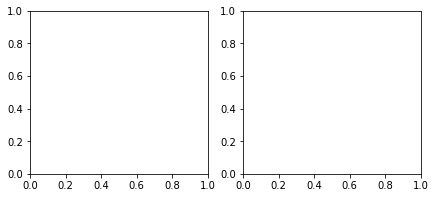

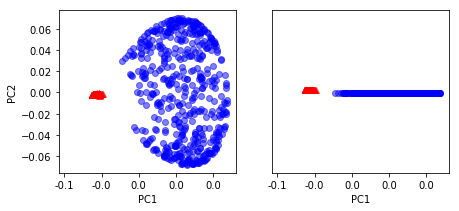

In [73]:
from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X,gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1], color = 'red', marker='^', alpha=0.5 )
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1], color = 'blue', marker='o', alpha=0.5 )
ax[1].scatter(X_kpca[y==0,0], np.zeros((500,1))+0.02, color = 'red', marker='^', alpha=0.5 )
ax[1].scatter(X_kpca[y==1,0], np.zeros((500,1))-0.02, color = 'blue', marker='o', alpha=0.5 )
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

plt.show()